In [1]:
# imporet necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the dataset into pandas dataframe
df=pd.read_csv('train_BRCpofr.csv', index_col='id')
df.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
id,,,,,,,,,,,
1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


# understanding the data its central tendency and spread

In [3]:
df.describe()

,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000
mean,0.575488,4.595669,4351.502416,97952.828978
std,0.494272,2.290446,3262.359775,90613.814793
min,0.000000,0.000000,0.000000,24828.000000
25%,0.000000,3.000000,2406.000000,52836.000000
50%,1.000000,5.000000,4089.000000,66396.000000
75%,1.000000,6.000000,6094.000000,103440.000000
max,1.000000,8.000000,31894.000000,724068.000000


# checking null values: No Null

In [4]:
df.isna().sum()

gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

# Checking datatype of columns

In [3]:
df.dtypes

gender            object
area              object
qualification     object
income            object
marital_status     int64
vintage            int64
claim_amount       int64
num_policies      object
policy            object
type_of_policy    object
cltv               int64
dtype: object

# Having a look at different categorical variables

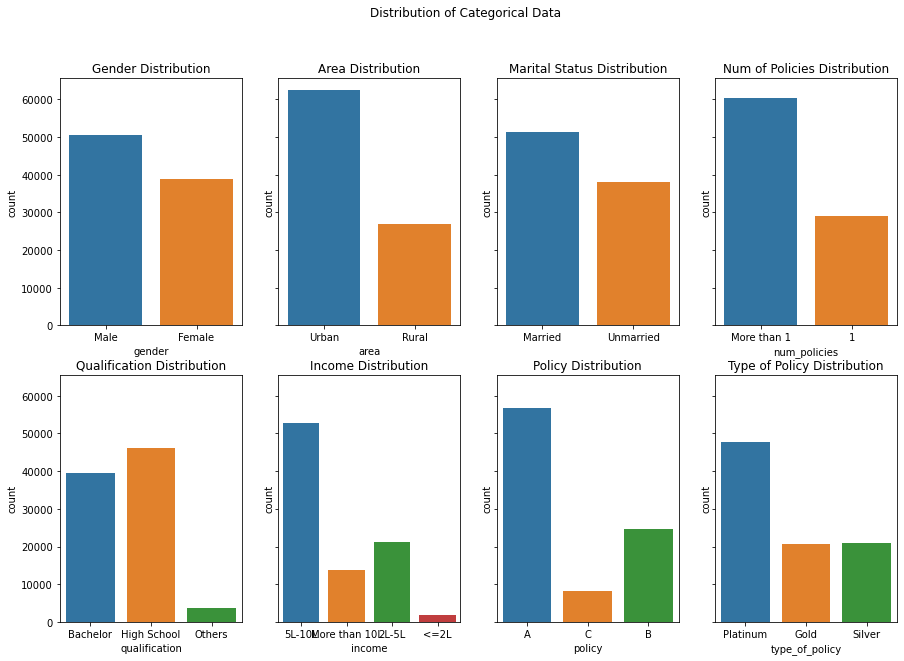

In [4]:

fig, axes = plt.subplots(2, 4, sharey=True,figsize=(15,10))
fig.suptitle('Distribution of Categorical Data')

sns.countplot(data=df,x='gender', ax=axes[0,0])
axes[0,0].set_title('Gender Distribution')

sns.countplot(data=df,x='area', ax=axes[0,1])
axes[0,1].set_title('Area Distribution')

sns.countplot(x=list(map(lambda x:'Married' if x==1 else 'Unmarried', df['marital_status'])), ax=axes[0,2])
axes[0,2].set_title('Marital Status Distribution')

sns.countplot(data=df,x='num_policies', ax=axes[0,3])
axes[0,3].set_title('Num of Policies Distribution')


sns.countplot(data=df,x='qualification', ax=axes[1,0])
axes[1,0].set_title('Qualification Distribution')

sns.countplot(data=df,x='income', ax=axes[1,1])
axes[1,1].set_title('Income Distribution')

sns.countplot(data=df,x='policy', ax=axes[1,2])
axes[1,2].set_title('Policy Distribution')

sns.countplot(data=df,x='type_of_policy', ax=axes[1,3])
axes[1,3].set_title('Type of Policy Distribution')


plt.show()

# numerical variable distributions

<AxesSubplot:xlabel='vintage', ylabel='Density'>

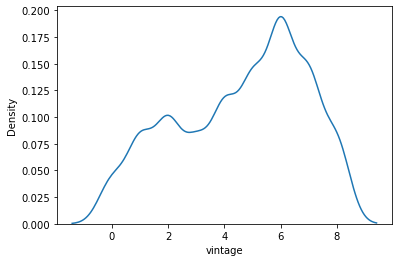

In [5]:
sns.kdeplot(data=df,x='vintage', bw_adjust=2)

In [6]:
df.vintage.skew()

-0.37826679130374985

# The vintage density plot is negatively skewed . That means number of new members is declining

<AxesSubplot:xlabel='claim_amount', ylabel='Density'>

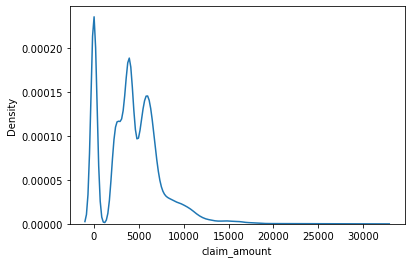

In [9]:
sns.kdeplot(data=df,x='claim_amount')

# Mostly members never claim any damages or money but if a claim is made it is mostly around 4000 

<AxesSubplot:xlabel='cltv', ylabel='Density'>

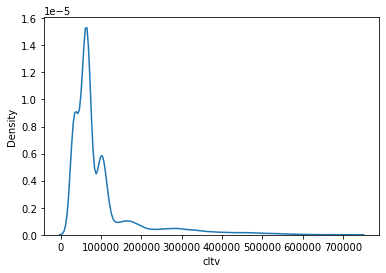

In [46]:
sns.kdeplot(data=df, x='cltv')

<AxesSubplot:xlabel='cltv', ylabel='Density'>

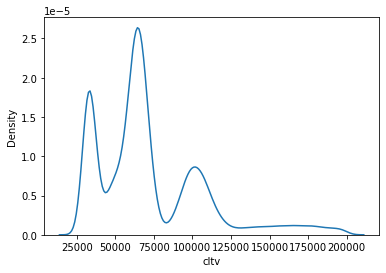

In [10]:
sns.kdeplot(data=df[df.cltv<200000], x='cltv')

<AxesSubplot:xlabel='cltv', ylabel='Density'>

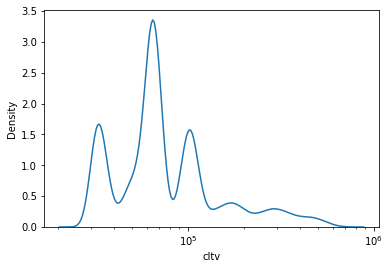

In [11]:
sns.kdeplot(data=df, x='cltv',log_scale=True)

In [12]:
cat_cols=['gender', 'area', 'qualification', 'marital_status',
           'income','num_policies', 'policy', 'type_of_policy']

In [13]:
pd.pivot_table(data=df,index=cat_cols, values='cltv',aggfunc='median')

cltv
gender area  qualification marital_status income        num_policies policy type_of_policy        
Female Rural Bachelor      0              2L-5L         1            A      Gold             54042
                                                                            Platinum         36768
                                                                            Silver           56454
                                                                     B      Gold             68700
                                                                            Platinum         59172
...                                                                                            ...
Male   Urban Others        1              More than 10L More than 1  B      Platinum         82884
                                                                            Silver           62136
                                                                     C      Gold            141180
                                                                            Platinum         63498
                                                                            Silver           65208

[1431 rows x 1 columns]

In [14]:
def show_pivot(col):
    df_pivot=pd.pivot_table(data=df,index=[col], values='cltv', aggfunc=['count','mean','median'])
    print(df_pivot,'\n\n')

In [15]:
for col in cat_cols:
    show_pivot(col)

        count          mean median
         cltv          cltv   cltv
gender                            
Female  38895  98088.878056  67152
Male    50497  97848.038022  65832 


       count           mean median
        cltv           cltv   cltv
area                              
Rural  26937   79587.316182  63924
Urban  62455  105873.921255  67596 


               count          mean median
                cltv          cltv   cltv
qualification                            
Bachelor       39399  98515.392675  66864
High School    46247  99119.447575  66432
Others          3746  77633.272824  60516 


                count           mean median
                 cltv           cltv   cltv
marital_status                             
0               37948  106155.045536  68196
1               51444   91902.410777  65292 


               count           mean median
                cltv           cltv   cltv
income                                    
2L-5L          21158  109467.408073  

<AxesSubplot:xlabel='claim_amount', ylabel='cltv'>

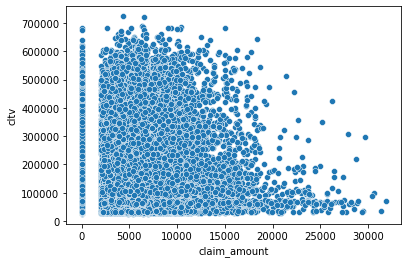

In [16]:
sns.scatterplot(data=df,x='claim_amount',y='cltv')

<AxesSubplot:xlabel='claim_amount', ylabel='cltv'>

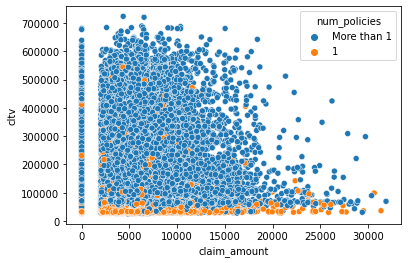

In [17]:
sns.scatterplot(data=df,x='claim_amount',y='cltv',hue='num_policies')

<AxesSubplot:xlabel='cltv', ylabel='claim_amount'>

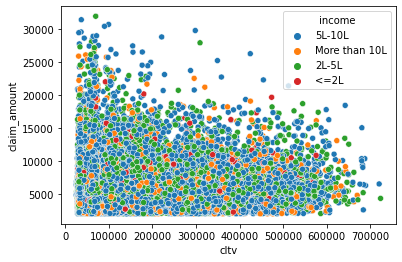

In [18]:
sns.scatterplot(data=df[df.claim_amount>0],y='claim_amount',x='cltv',hue='income')

<AxesSubplot:xlabel='cltv', ylabel='vintage'>

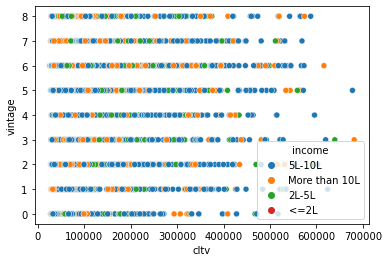

In [19]:
sns.scatterplot(data=df[df.claim_amount==0],y='vintage',x='cltv',hue='income')

In [20]:
df.columns

Index(['gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [21]:
pd.pivot_table(data=df[df.claim_amount==0],index=['vintage'], values=['cltv'], aggfunc=['min','max','count','mean','median'])

,min,max,count,mean,median
,cltv,cltv,cltv,cltv,cltv
vintage,,,,,
0,27168,517152,1074,66945.106145,59286
1,27528,624216,1479,71082.791075,59052
2,27432,602688,1628,78140.786241,62328
3,27792,681204,1292,82692.037152,64452
4,27792,595776,2081,74984.101874,62736
5,27240,677472,2409,74550.306351,61068
6,25284,616032,3549,76711.469146,62628
7,27096,568776,2652,75473.579186,63528


In [22]:
pd.pivot_table(data=df[df.claim_amount>0],index=['vintage'], values=['cltv'], aggfunc=['min','max','count','mean','median'])

,min,max,count,mean,median
,cltv,cltv,cltv,cltv,cltv
vintage,,,,,
0,27420,662760,2957,94246.843422,65436
1,26904,684468,6192,97575.912791,65406
2,24828,641100,7537,104506.361682,67500
3,25536,681108,5793,109260.629726,68748
4,27012,689808,8390,103889.536591,67560
5,27012,683340,10072,101314.407069,66690
6,27552,649284,14220,102831.234599,67176
7,24876,724068,10443,104238.120080,67968


In [23]:
df[df.claim_amount==0].describe()

,marital_status,vintage,claim_amount,cltv
count,17671.000000,17671.000000,17671.0,17671.000000
mean,0.634825,4.577783,0.0,75791.432969
std,0.481493,2.342792,0.0,64030.244508
min,0.000000,0.000000,0.0,25284.000000
25%,0.000000,3.000000,0.0,38448.000000
50%,1.000000,5.000000,0.0,62640.000000
75%,1.000000,6.000000,0.0,75036.000000
max,1.000000,8.000000,0.0,681204.000000


<AxesSubplot:>

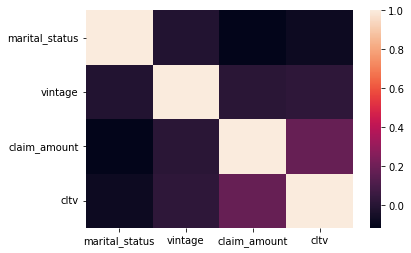

In [28]:
sns.heatmap(df.corr())